In [1]:
#importar librerías necesarias
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
datos_udg_admision_df_A = pd.DataFrame()

In [3]:
#Leer datos de los archivos excel originales y crear un DataFrame para el calendario A
for f in glob.glob('/Users/mariomorales/Documents/ITESO/TOG/modelo_ingreso_udg/datos/Puntajes_minimos_CUs_20*A.xlsx'):
    df = pd.read_excel(f, header=1, usecols=[0,1,2,3,4,5,7,8])
    df.set_index(['CENTRO'], inplace=True)
    datos_udg_admision_df_A = datos_udg_admision_df_A.append(df)

In [4]:
#Agregar identificador 1 para calendario A en una nueva columna
datos_udg_admision_df_A['CALENDARIO'] = '1'

In [5]:
datos_udg_admision_df_B = pd.DataFrame()

In [6]:
#Leer datos de los archivos excel originales y crear un DataFrame para el calendario B
for f in glob.glob('/Users/mariomorales/Documents/ITESO/TOG/modelo_ingreso_udg/datos/Puntajes_minimos_CUs_20*B.xlsx'):
    df = pd.read_excel(f, header=1, usecols=[0,1,2,3,4,5,7,8])
    df.set_index(['CENTRO'], inplace=True)
    datos_udg_admision_df_B = datos_udg_admision_df_B.append(df)

In [7]:
#Agregar identificador 1 para calendario B en una nueva columna
datos_udg_admision_df_B['CALENDARIO'] = '2'

In [8]:
datos_udg_admision_df = datos_udg_admision_df_A.append(datos_udg_admision_df_B)

In [9]:
datos_udg_admision_df.head()

,CARRERA,ASPIRANTES,ADMITIDOS,NO_ADMITIDOS,CUPO,PORCENTAJE_ADMISION,PUNTAJE_MINIMO,CALENDARIO
CENTRO,,,,,,,,
CUAAD,LICENCIATURA EN ARQUITECTURA,876,211,665,211,0.240868,159.053,1
CUAAD,LICENCIATURA EN DISEÑO DE INTERIORES Y AMBIENT...,250,70,180,70,0.280000,148.819,1
CUAAD,LICENCIATURA EN DISEÑO DE MODAS,69,40,29,40,0.579710,143.556,1
CUAAD,LICENCIATURA EN DISEÑO INDUSTRIAL,238,75,163,75,0.315126,156.847,1
CUAAD,LICENCIATURA EN DISEÑO PARA LA COMUNICACION GR...,310,167,143,167,0.538710,138.177,1


In [10]:
#Revisamos la información del Data Frame para ver el tipo de datos
datos_udg_admision_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4205 entries, CUAAD to nan
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CARRERA              4203 non-null   object 
 1   ASPIRANTES           4205 non-null   int64  
 2   ADMITIDOS            4205 non-null   int64  
 3   NO_ADMITIDOS         4205 non-null   int64  
 4   CUPO                 4205 non-null   int64  
 5   PORCENTAJE_ADMISION  4205 non-null   float64
 6   PUNTAJE_MINIMO       4187 non-null   object 
 7   CALENDARIO           4205 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 295.7+ KB


In [11]:
datos_udg_admision_df['PUNTAJE_MINIMO'] = pd.to_numeric(datos_udg_admision_df['PUNTAJE_MINIMO'],errors = 'coerce')
datos_udg_admision_df['CALENDARIO'] = pd.to_numeric(datos_udg_admision_df['CALENDARIO'],errors = 'coerce')

In [12]:
#reemplazar variable de porcentaje de admisión por categoría dicotómica
#probabilidad alta = 1, cuando el % de admisión es mayor al 25%
#probabilidad baja = 0, cuando el % de admisión es menor a 25%
datos_udg_admision_df['PROB_ALTA'] = np.where(datos_udg_admision_df.PORCENTAJE_ADMISION < .25, 0, 1)
datos_udg_admision_df = datos_udg_admision_df.drop(columns = 'PORCENTAJE_ADMISION')

In [13]:
datos_udg_admision_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4205 entries, CUAAD to nan
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CARRERA         4203 non-null   object 
 1   ASPIRANTES      4205 non-null   int64  
 2   ADMITIDOS       4205 non-null   int64  
 3   NO_ADMITIDOS    4205 non-null   int64  
 4   CUPO            4205 non-null   int64  
 5   PUNTAJE_MINIMO  4186 non-null   float64
 6   CALENDARIO      4205 non-null   int64  
 7   PROB_ALTA       4205 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 295.7+ KB


In [14]:
datos_udg_admision_df.isnull().values.any()

True

In [15]:
df = datos_udg_admision_df.dropna()

In [16]:
df.isnull().values.any()

False

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4186 entries, CUAAD to SUV
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CARRERA         4186 non-null   object 
 1   ASPIRANTES      4186 non-null   int64  
 2   ADMITIDOS       4186 non-null   int64  
 3   NO_ADMITIDOS    4186 non-null   int64  
 4   CUPO            4186 non-null   int64  
 5   PUNTAJE_MINIMO  4186 non-null   float64
 6   CALENDARIO      4186 non-null   int64  
 7   PROB_ALTA       4186 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 294.3+ KB


In [18]:
#visualización del nuevo dataframe con la nueva variable de probabilidad
df.head()

,CARRERA,ASPIRANTES,ADMITIDOS,NO_ADMITIDOS,CUPO,PUNTAJE_MINIMO,CALENDARIO,PROB_ALTA
CENTRO,,,,,,,,
CUAAD,LICENCIATURA EN ARQUITECTURA,876,211,665,211,159.053,1,0
CUAAD,LICENCIATURA EN DISEÑO DE INTERIORES Y AMBIENT...,250,70,180,70,148.819,1,1
CUAAD,LICENCIATURA EN DISEÑO DE MODAS,69,40,29,40,143.556,1,1
CUAAD,LICENCIATURA EN DISEÑO INDUSTRIAL,238,75,163,75,156.847,1,1
CUAAD,LICENCIATURA EN DISEÑO PARA LA COMUNICACION GR...,310,167,143,167,138.177,1,1


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROB_ALTA', ylabel='count'>

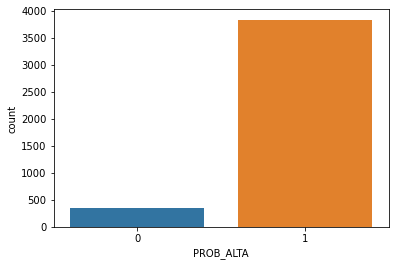

In [19]:
#visualizar cuántas carreras con probabilidad alta y cuántas con probabilidad baja hay en el dataframe
sns.countplot(df['PROB_ALTA'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CALENDARIO', ylabel='count'>

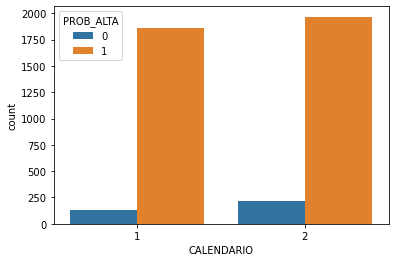

In [20]:
#visualizar cuántas hay de cada una por calendario (calendario A = 1, calendario B = 2)
#Se confirma que en el calendario B hay más carreras con probabilidad baja de ingreso
sns.countplot(df['CALENDARIO'],hue=df['PROB_ALTA'])

(array([284.,  81., 417., 699., 546., 700., 694., 435., 223., 107.]),
 array([ 60. ,  72.2,  84.4,  96.6, 108.8, 121. , 133.2, 145.4, 157.6,
        169.8, 182. ]),
 <BarContainer object of 10 artists>)

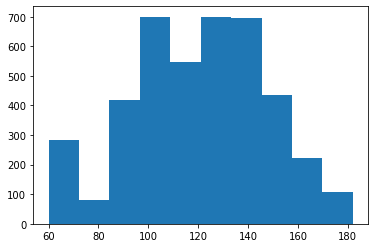

In [21]:
plt.hist(df['PUNTAJE_MINIMO'], bins=10)

In [22]:
df.describe()

,ASPIRANTES,ADMITIDOS,NO_ADMITIDOS,CUPO,PUNTAJE_MINIMO,CALENDARIO,PROB_ALTA
count,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000
mean,188.194458,75.307692,112.927855,80.428571,120.159733,1.522217,0.915671
std,323.540199,75.938659,271.473959,76.434508,27.176213,0.499566,0.277913
min,1.000000,1.000000,-6.000000,3.000000,60.000000,1.000000,0.000000
25%,36.000000,33.000000,0.000000,40.000000,100.923625,1.000000,1.000000
50%,79.000000,45.000000,19.000000,45.000000,122.477800,2.000000,1.000000
75%,177.750000,82.000000,88.000000,88.000000,139.913325,2.000000,1.000000
max,4129.000000,475.000000,3779.000000,661.000000,182.000000,2.000000,1.000000


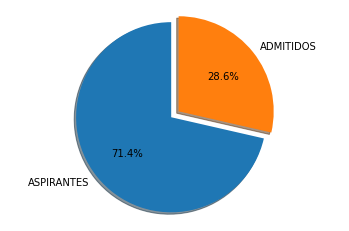

In [23]:
labels = 'ASPIRANTES', 'ADMITIDOS'
sizes = [188.194458, 75.307692]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [24]:
#Separar el conjunto de datos en variables dependientes e independientes
feature_cols = ['CALENDARIO','PUNTAJE_MINIMO','CUPO','ADMITIDOS','ASPIRANTES']
X = df[feature_cols]
y = df.PROB_ALTA

In [25]:
#separar los datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
#llamar la clase de sklearn para crear la clasificación del árbol de decisión
clf = DecisionTreeClassifier()
#hacer el ajuste del modelo
clf = clf.fit(X_train,y_train)
#usar el modelo entrenado para predecir las clases del conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [27]:
#revisar porcentaje de precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9681528662420382


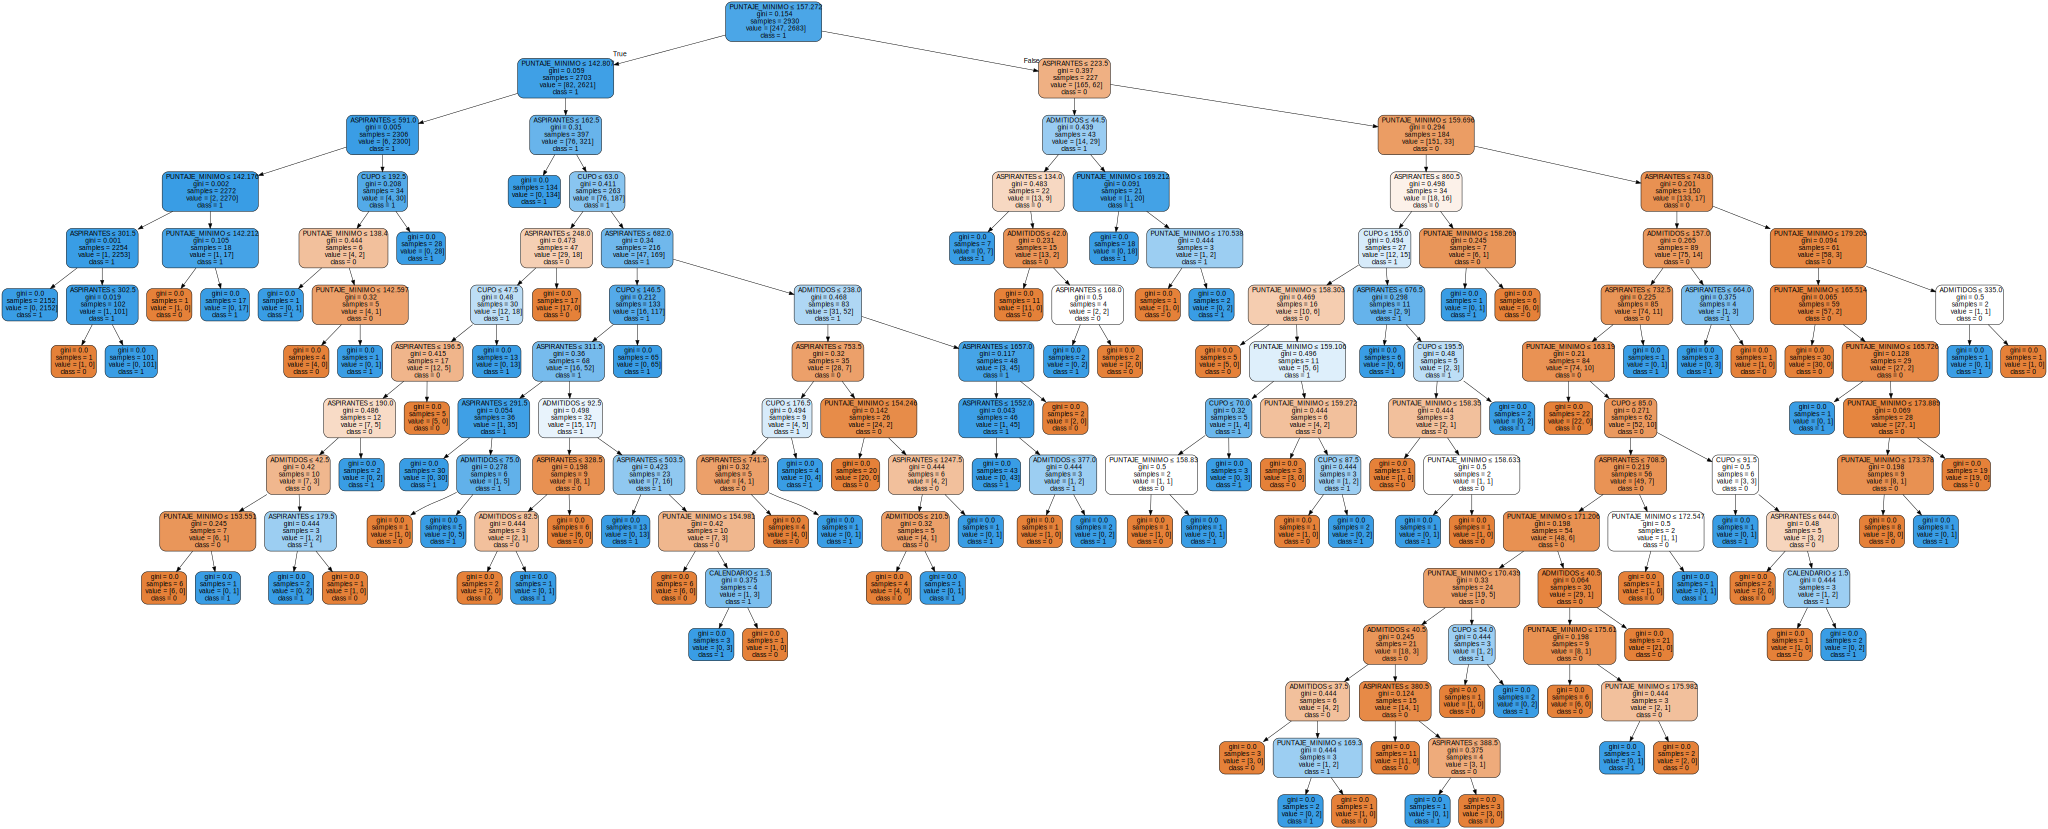

In [28]:
#visualización del árbol
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,
                    feature_names = feature_cols,
                    class_names=['0','1'],
                    filled=True, rounded=True,
                    special_characters=True)

graph = graphviz.Source(dot_data)  
graph

In [29]:
#volvemos a entrenar el modelo con parámetros para reducir el tamaño del árbol
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9593949044585988


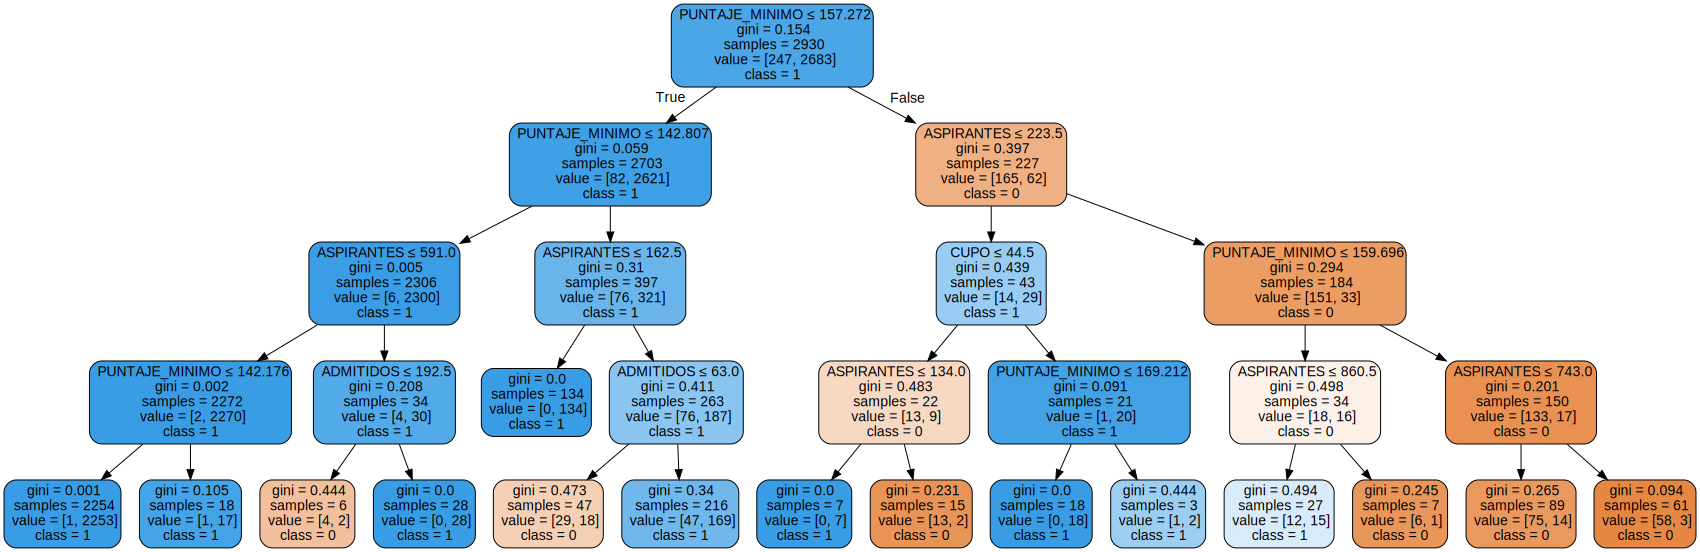

In [30]:
#visualización del nuevo árbol
dot_data = tree.export_graphviz(clf, out_file=None,
                    feature_names = feature_cols,
                    class_names=['0','1'],
                    filled=True, rounded=True,
                    special_characters=True)

graph = graphviz.Source(dot_data)  
graph

In [31]:
#crear un dataframe de prueba para una carrera altamente demandada
medico_cirujano_cucs_2021B = {'CALENDARIO':[2], 'PUNTAJE_MINIMO':[180.41], 'CUPO':[367], 'ADMITIDOS':[367], 'ASPIRANTES':[4403]}
test0_df = pd.DataFrame(medico_cirujano_cucs_2021B)
test0_df.head()

,CALENDARIO,PUNTAJE_MINIMO,CUPO,ADMITIDOS,ASPIRANTES
0,2,180.41,367,367,4403


In [32]:
#probar la predicción de la clase a que pertenece este dataframe
test0_pred = clf.predict(test0_df)
print(test0_pred)

[0]


In [33]:
test0_df

,CALENDARIO,PUNTAJE_MINIMO,CUPO,ADMITIDOS,ASPIRANTES
0,2,180.41,367,367,4403


In [34]:
lic_informatica_cucei_2021B = {'CALENDARIO':[2], 'PUNTAJE_MINIMO':[150.37], 'CUPO':[275], 'ADMITIDOS':[275], 'ASPIRANTES':[703]}
test1_df = pd.DataFrame(lic_informatica_cucei_2021B)
test1_df.head()

,CALENDARIO,PUNTAJE_MINIMO,CUPO,ADMITIDOS,ASPIRANTES
0,2,150.37,275,275,703


In [35]:
test1_pred = clf.predict(test1_df)
print(test1_pred)

[1]


In [36]:
#importamos la librería Pickle para poder almacenar el modelo entrenado en disco
import pickle

In [47]:
#usamos Pickle para guardar el modelo entrenado como un archivo que podemos utilizar más tarde
with open('/Users/mariomorales/Documents/ITESO/TOG/modelo_ingreso_udg/model/modelo_udg.pkl', 'wb') as file:
    pickle.dump(clf, file, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
with open(f'/Users/mariomorales/Documents/ITESO/TOG/modelo_ingreso_udg/model/modelo_udg.pkl', 'rb') as f:
    model = pickle.load(f)

In [49]:
test0_pickle_pred = model.predict(test0_df)
print(test0_pred)

[0]


In [50]:
test1_pickle_pred = model.predict(test1_df)
print(test1_pred)

[1]
